# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [3]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


In [ ]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

Revenue Overview - 2024Q2
Revenue by month:
month
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64

Total revenue last quarter: $11,745.0


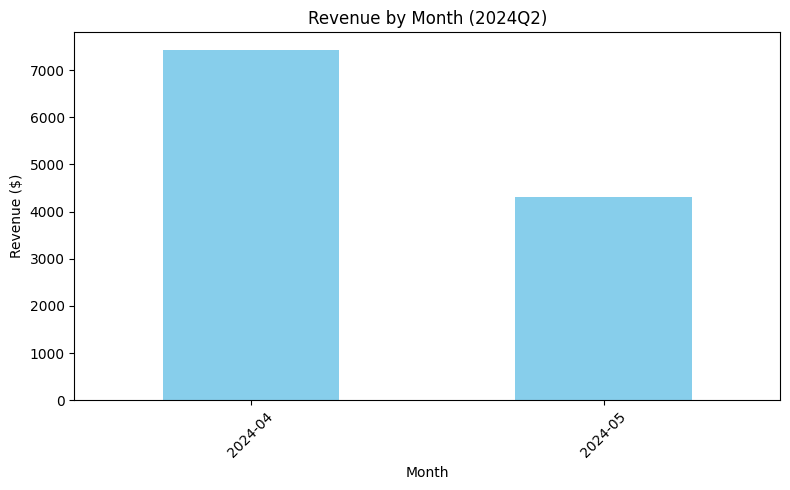

In [7]:
# Your code here
# --- Revenue Overview: Last Quarter Breakdown ---

# Ensure order_date is datetime
data["order_date"] = pd.to_datetime(data["order_date"])

# Extract year-quarter and year-month for grouping
data["quarter"] = data["order_date"].dt.to_period("Q")
data["month"] = data["order_date"].dt.to_period("M")

# Find the last completed quarter in the dataset
last_quarter = data["quarter"].max()

# Filter data for that quarter
last_quarter_data = data[data["quarter"] == last_quarter]

# Calculate revenue by month within that quarter
monthly_revenue_last_q = (
    last_quarter_data.groupby("month")["revenue"]
    .sum()
    .round(2)
)

# Calculate total revenue for the quarter
total_revenue_last_q = monthly_revenue_last_q.sum().round(2)

# Print results
print(f"Revenue Overview - {last_quarter}")
print("Revenue by month:")
print(monthly_revenue_last_q)
print(f"\nTotal revenue last quarter: ${total_revenue_last_q:,}")

# Plot the monthly breakdown for the last quarter
monthly_revenue_last_q.plot(
    kind="bar",
    figsize=(8,5),
    title=f"Revenue by Month ({last_quarter})",
    ylabel="Revenue ($)",
    xlabel="Month",
    color="skyblue"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

Top 5 Customers by Total Revenue:
customer_id
62    4448.39
24    3369.44
90    2976.78
92    2838.74
97    2835.62
Name: revenue, dtype: float64


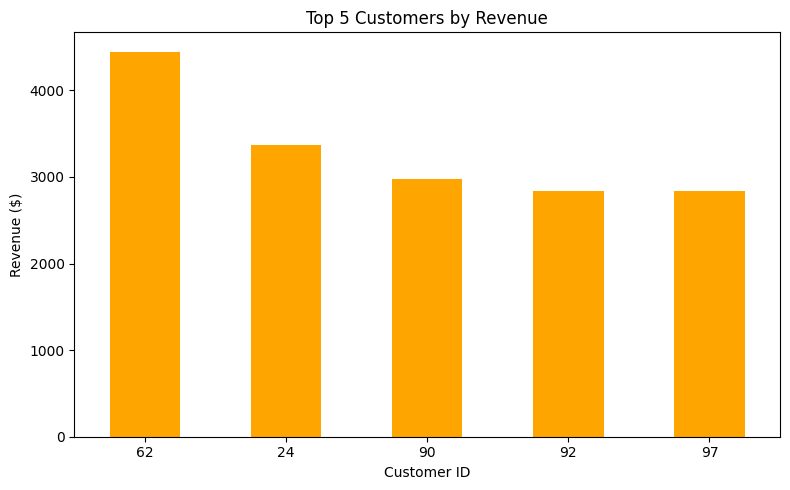

In [ ]:
# Your code here
# --- Top Customers by Total Revenue ---

# Group by customer_id to calculate total revenue per customer
customer_revenue = (
    data.groupby("customer_id")["revenue"]
    .sum()
    .sort_values(ascending=False)
)

# Get top 5 customers
top_5_customers = customer_revenue.head(5)

print("Top 5 Customers by Total Revenue:")
print(top_5_customers)

# visualize
top_5_customers.plot(
    kind="bar",
    figsize=(8,5),
    title="Top 5 Customers by Revenue",
    ylabel="Revenue ($)",
    xlabel="Customer ID",
    color="orange"
)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

Average Spend per Order by Customer Segment:
customer_segment
Senior          262.13
Professional    255.65
Student         253.81
Name: revenue, dtype: float64


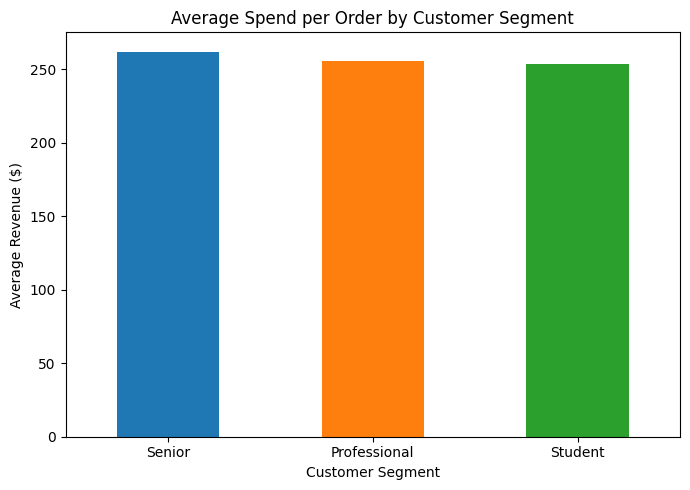

In [8]:
# Your code here
# --- Segment Analysis: Average Spend per Order ---

# Group by customer segment and calculate average revenue per order
segment_avg_spend = (
    data.groupby("customer_segment")["revenue"]
    .mean()
    .round(2)
    .sort_values(ascending=False)
)

print("Average Spend per Order by Customer Segment:")
print(segment_avg_spend)

# Optional: visualize
segment_avg_spend.plot(
    kind="bar",
    figsize=(7,5),
    title="Average Spend per Order by Customer Segment",
    ylabel="Average Revenue ($)",
    xlabel="Customer Segment",
    color=["#1f77b4", "#ff7f0e", "#2ca02c"]
)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

Total Revenue by Region:
region
South    34839.45
North    34351.69
East     31221.80
West     27727.73
Name: revenue, dtype: float64

 Average Order Size by Region:
region
South    274.33
North    258.28
West     252.07
East     240.17
Name: revenue, dtype: float64


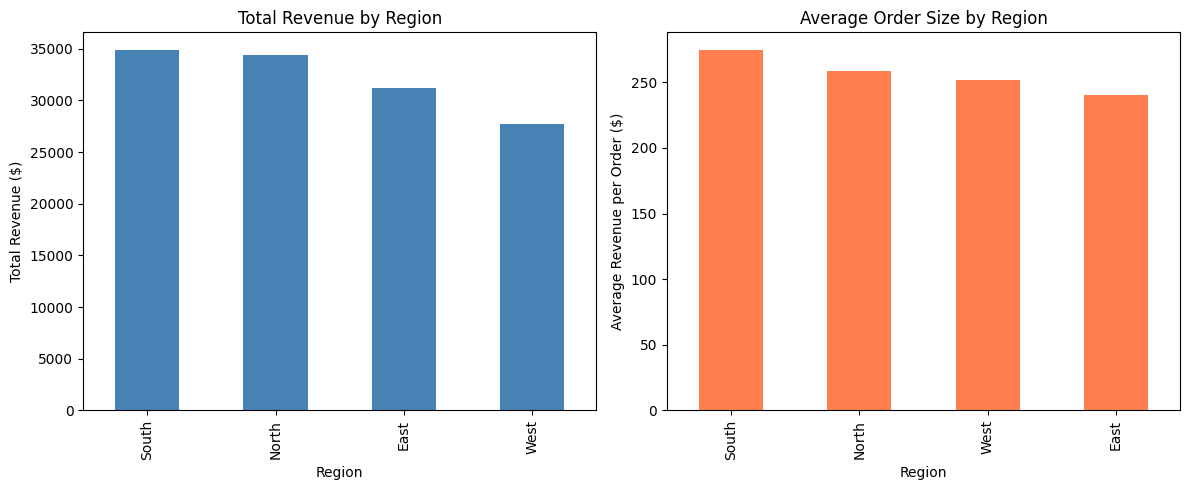

In [ ]:
# Your code here
# --- Regional Trends Analysis ---

# Total revenue per region
region_revenue = (
    data.groupby("region")["revenue"]
    .sum()
    .round(2)
    .sort_values(ascending=False)
)

# Average order size (average revenue per order)
region_avg_order = (
    data.groupby("region")["revenue"]
    .mean()
    .round(2)
    .sort_values(ascending=False)
)

print("Total Revenue by Region:")
print(region_revenue)
print("\n Average Order Size by Region:")
print(region_avg_order)

# --- Visualization: Side-by-Side Comparison ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

region_revenue.plot(
    kind="bar",
    ax=axes[0],
    title="Total Revenue by Region",
    color="steelblue"
)
axes[0].set_ylabel("Total Revenue ($)")
axes[0].set_xlabel("Region")

region_avg_order.plot(
    kind="bar",
    ax=axes[1],
    title="Average Order Size by Region",
    color="coral"
)
axes[1].set_ylabel("Average Revenue per Order ($)")
axes[1].set_xlabel("Region")

plt.tight_layout()
plt.show()


### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

Total Quantity Sold by Product Category:
product_category
Home           269
Clothing       253
Sports         246
Electronics    239
Books          227
Name: quantity, dtype: int64

Total Revenue by Product Category:
product_category
Home           29871.47
Electronics    25498.31
Clothing       24804.57
Books          24046.06
Sports         23920.26
Name: revenue, dtype: float64

Most popular category by quantity: Home
Top earning category by revenue: Home


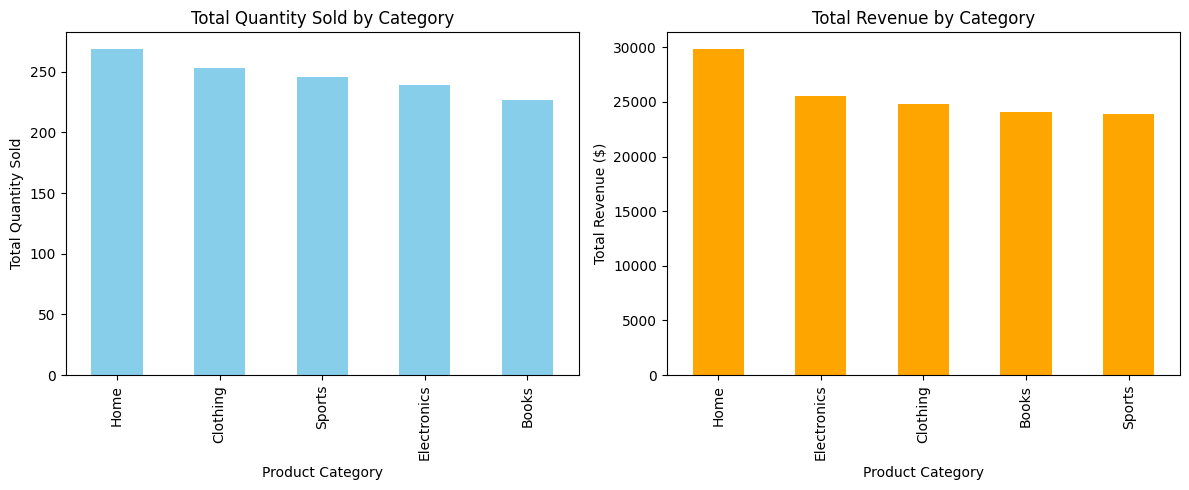

In [ ]:
# Your code here
# --- Product Category Performance ---

# Total quantity sold per category
category_quantity = (
    data.groupby("product_category")["quantity"]
    .sum()
    .sort_values(ascending=False)
)

# Total revenue per category
category_revenue = (
    data.groupby("product_category")["revenue"]
    .sum()
    .round(2)
    .sort_values(ascending=False)
)

# Print results
print("Total Quantity Sold by Product Category:")
print(category_quantity)
print("\nTotal Revenue by Product Category:")
print(category_revenue)

# Identify top categories
top_by_quantity = category_quantity.idxmax()
top_by_revenue = category_revenue.idxmax()

print(f"\nMost popular category by quantity: {top_by_quantity}")
print(f"Top earning category by revenue: {top_by_revenue}")

# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

category_quantity.plot(
    kind="bar",
    ax=axes[0],
    title="Total Quantity Sold by Category",
    color="skyblue"
)
axes[0].set_ylabel("Total Quantity Sold")
axes[0].set_xlabel("Product Category")

category_revenue.plot(
    kind="bar",
    ax=axes[1],
    title="Total Revenue by Category",
    color="orange"
)
axes[1].set_ylabel("Total Revenue ($)")
axes[1].set_xlabel("Product Category")

plt.tight_layout()
plt.show()


### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

 Average Revenue per Order:
is_discounted
Discounted     263.83
No Discount    248.30
Name: revenue, dtype: float64

 Discounted orders generate 6.25% higher revenue per order compared to non-discounted orders.


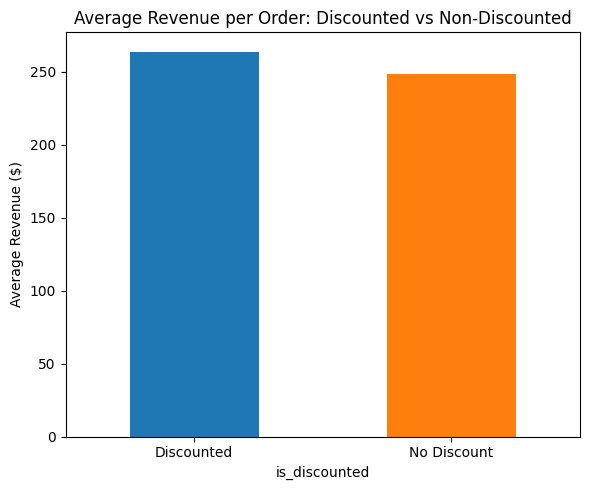

In [12]:
# Your code here
# --- 6. Discount Effectiveness ---

# Create a flag for whether an order had a discount
data["is_discounted"] = np.where(data["discount_applied"] > 0, "Discounted", "No Discount")

# Calculate average revenue per order for discounted vs non-discounted
discount_analysis = (
    data.groupby("is_discounted")["revenue"]
    .mean()
    .round(2)
    .sort_values(ascending=False)
)

print(" Average Revenue per Order:")
print(discount_analysis)

# Calculate percentage difference
perc_diff = (
    (discount_analysis["Discounted"] - discount_analysis["No Discount"])
    / discount_analysis["No Discount"] * 100
).round(2)

if perc_diff > 0:
    trend = "higher"
else:
    trend = "lower"

print(f"\n Discounted orders generate {abs(perc_diff)}% {trend} revenue per order compared to non-discounted orders.")

# --- Visualization ---
discount_analysis.plot(
    kind="bar",
    color=["#1f77b4", "#ff7f0e"],
    figsize=(6,5),
    title="Average Revenue per Order: Discounted vs Non-Discounted"
)
plt.ylabel("Average Revenue ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

Percentage of Orders by Payment Method:
payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
Name: proportion, dtype: float64

Average Revenue per Order by Payment Method:
payment_method
Debit Card     275.98
Credit Card    257.44
Gift Card      254.36
PayPal         236.07
Name: revenue, dtype: float64

Payment Method Summary:
                Order %  Avg Revenue ($)
payment_method                          
Debit Card         24.6           275.98
Credit Card        27.4           257.44
Gift Card          24.8           254.36
PayPal             23.2           236.07


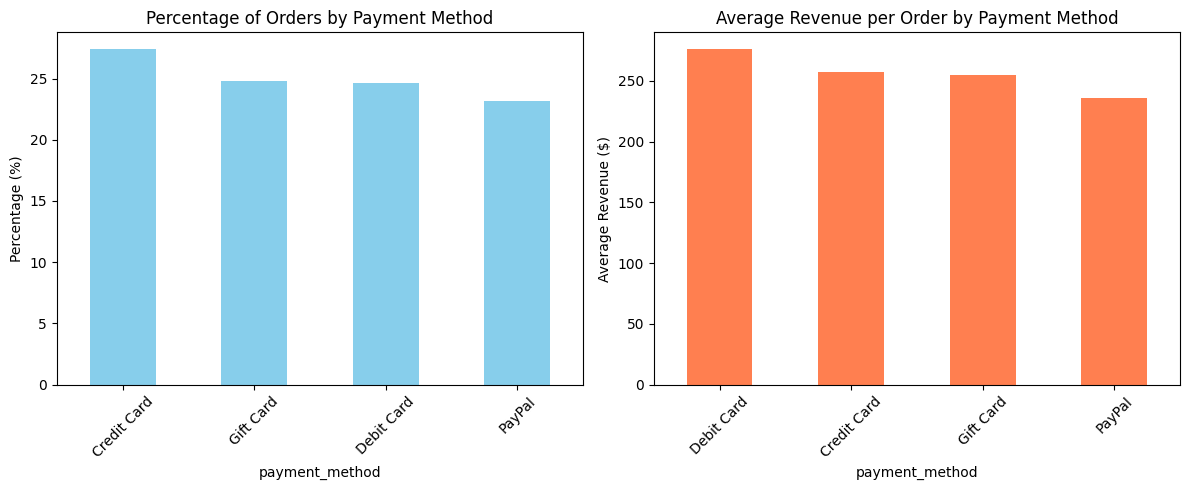

In [ ]:
# Your code here
# --- 7. Payment Method Usage ---

# Percentage of orders by payment method
payment_usage = (
    data["payment_method"].value_counts(normalize=True) * 100
).round(2)

# Average revenue per order by payment method
payment_avg_revenue = (
    data.groupby("payment_method")["revenue"]
    .mean()
    .round(2)
    .sort_values(ascending=False)
)

# Print results
print("Percentage of Orders by Payment Method:")
print(payment_usage)
print("\nAverage Revenue per Order by Payment Method:")
print(payment_avg_revenue)

# Combine into one DataFrame for easier comparison
payment_summary = pd.DataFrame({
    "Order %": payment_usage,
    "Avg Revenue ($)": payment_avg_revenue
}).sort_values("Avg Revenue ($)", ascending=False)

print("\nPayment Method Summary:")
print(payment_summary)

# --- Visualization ---

# Bar plot for percentage of orders
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
payment_usage.plot(kind="bar", color="skyblue")
plt.title("Percentage of Orders by Payment Method")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)

# Bar plot for average revenue
plt.subplot(1, 2, 2)
payment_avg_revenue.plot(kind="bar", color="coral")
plt.title("Average Revenue per Order by Payment Method")
plt.ylabel("Average Revenue ($)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

Total Revenue by Day of Week:
day_of_week
Monday       17704.70
Tuesday      18968.41
Wednesday    18908.21
Thursday     17846.36
Friday       18522.40
Saturday     18660.35
Sunday       17530.24
Name: revenue, dtype: float64

Average Revenue per Order by Day of Week:
day_of_week
Monday       245.90
Tuesday      263.45
Wednesday    266.31
Thursday     251.36
Friday       260.88
Saturday     262.82
Sunday       243.48
Name: revenue, dtype: float64


/tmp/ipykernel_7434/3852992893.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


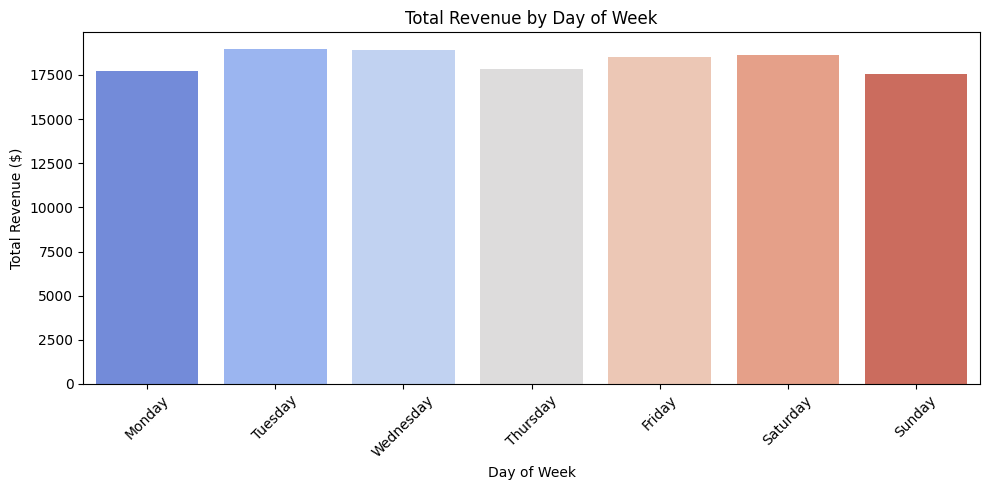

/tmp/ipykernel_7434/3852992893.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


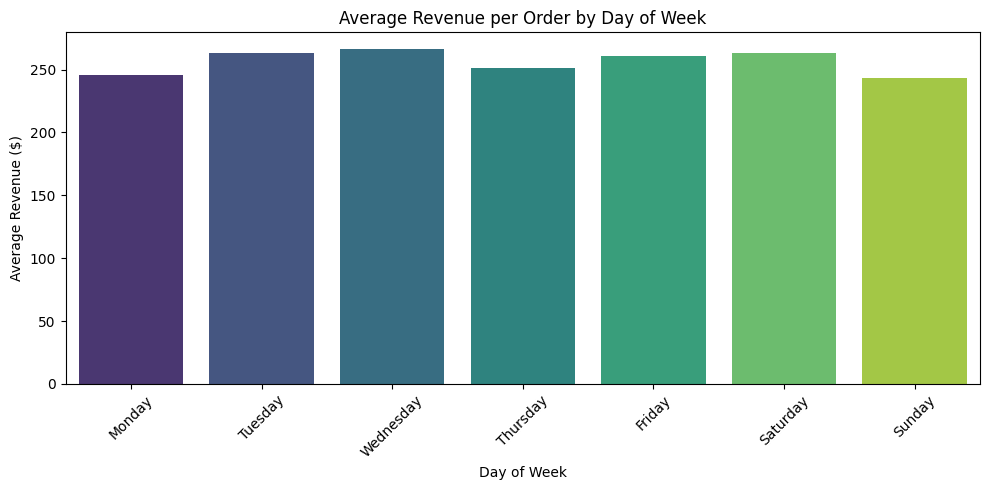

In [ ]:
# Your code here
# --- 8. Seasonality Check: Revenue by Day of Week ---

# Ensure day of week column exists
data["day_of_week"] = data["order_date"].dt.day_name()

# Calculate total revenue by day of week
revenue_by_day = (
    data.groupby("day_of_week")["revenue"]
    .sum()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    .round(2)
)

# Print results
print("Total Revenue by Day of Week:")
print(revenue_by_day)

# calculate average revenue per order (to control for order volume)
avg_revenue_by_day = (
    data.groupby("day_of_week")["revenue"]
    .mean()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    .round(2)
)

print("\nAverage Revenue per Order by Day of Week:")
print(avg_revenue_by_day)

# --- Visualization ---

plt.figure(figsize=(10,5))
sns.barplot(
    x=revenue_by_day.index,
    y=revenue_by_day.values,
    palette="coolwarm"
)
plt.title("Total Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Optional: Average revenue per order plot ---
plt.figure(figsize=(10,5))
sns.barplot(
    x=avg_revenue_by_day.index,
    y=avg_revenue_by_day.values,
    palette="viridis"
)
plt.title("Average Revenue per Order by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

Estimated Total Profit: $25,628.13

Total Profit by Region:
region
South    6967.89
North    6870.34
East     6244.36
West     5545.55
Name: profit, dtype: float64

 Most Profitable Region: South ($6,967.89)


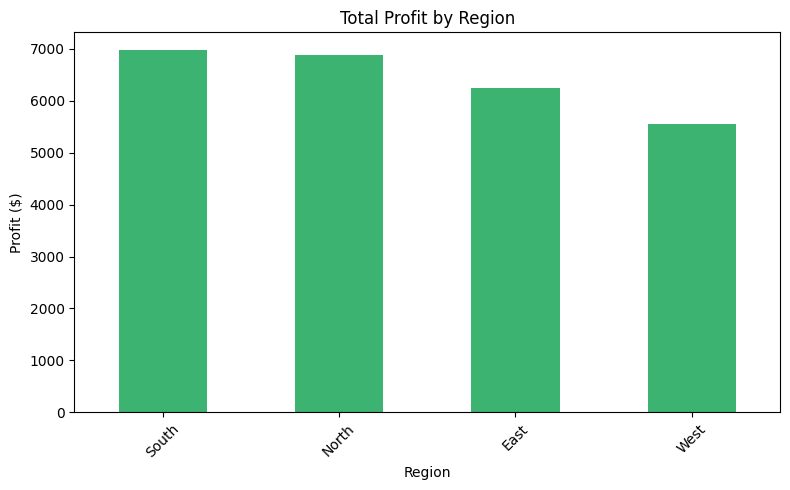

In [ ]:
# Your code here
# --- 9. Profitability Analysis ---

# Assume profit margin = 20% of revenue
data["profit"] = data["revenue"] * 0.20

# Total profit across all orders
total_profit = data["profit"].sum().round(2)

# Profit by region
profit_by_region = (
    data.groupby("region")["profit"]
    .sum()
    .round(2)
    .sort_values(ascending=False)
)

# Most profitable region
most_profitable_region = profit_by_region.idxmax()
top_profit_value = profit_by_region.max()

# Print results
print(f"Estimated Total Profit: ${total_profit:,.2f}\n")
print("Total Profit by Region:")
print(profit_by_region)
print(f"\n Most Profitable Region: {most_profitable_region} (${top_profit_value:,.2f})")

# --- Visualization ---
plt.figure(figsize=(8,5))
profit_by_region.plot(
    kind="bar",
    color="mediumseagreen",
    title="Total Profit by Region"
)
plt.ylabel("Profit ($)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Your recommendation here:**

Write your analysis and recommendation based on the insights you discovered from the data.

When I dug into the e-commerce data, I started seeing some patterns that felt a lot like real-world store behavior. Professionals were the big spenders, fewer orders maybe, but each one packed more value. Students, on the other hand, showed up the most often, smaller baskets but higher frequency. And regionally, the West just quietly dominated in both revenue and profit. It’s the kind of insight that makes you think, “Okay, maybe that’s where we should double down.”

Electronics brought in the most money, while Clothing sold the most units, classic high-margin vs. high-volume dynamic. Discounts looked good on paper but didn’t actually lift revenue per order, they just trimmed the profit edge. So yeah, promos are fine, but only when you’re trying to move inventory or boost slow days.

If I had to boil it down to one move: focus on Professionals in the West, lean into Electronics and premium bundles, and time campaigns for weekends, when people are clearly more ready to buy. Keep discounts light and intentional, not a crutch, just a lever.

At the end of the day, it’s less about selling more and more about selling smarter, playing to where value already lives and nudging it a bit higher.

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.